# **Tutorial 4: Reconstructing Past Changes in Atmospheric Climate**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Brodie Pearson

**Content editors:** Yosmely Bermúdez

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

###**Code and Data Sources**

Code for this tutorial is based on an existing notebook from LinkedEarth that [explores EPICA Dome C paleoclimate records](https://github.com/LinkedEarth/PaleoBooks/blob/master/notebooks/EpicaDomeC_explore.ipynb). 

Data from the following sources are used in this tutorial:

*   Jouzel, J., et al. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years, Science (2007). https:/DOI: 10.1126/science.1141038
*   Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949.
*   Bereiter, B. et al., Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geoph. Res. Let. (2014).  https://doi.org/10.1002/2014GL061957. 















#**Tutorial 4 Objectives**

In this tutorial, we’ll analyze δD and atmospheric CO2 data from the EPICA Dome C ice core. Recall from the introductory video that δD and δ18O measurements on ice cores records past changes in temperature, and that measurements of CO2 trapped in ice cores can be used to reconstruction past changes in Earth's atmospheric composition.


By the end of this tutorial you will be able to:

*   Plot δD and CO2 records from the EPICA Dome C ice core
*   Assess changes in temperature and atmospheric greenhouse gas concentration over the past 800,000 years 




In [ ]:
# Install libraries
!pip install pandas
!pip install pooch

!pip install cartopy
!pip install Pyleoclim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 30.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113649 sha256=e3d8af6c617c99dedf085b9e78ee5cfdd7b7f14cc64907542ac5274bcfb35dcc
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://

In [ ]:
# Import libraries
import pandas as pd
import pooch
import pyleoclim as pyleo

## Exploring past variations in atmospheric CO2

As we learned in the introductory video, paleoclimatologists can reconstruct past changes in atmospheric composition by measuring gases trapped in layers of ice from ice cores retrieved from polar regions and high elevation mountain glaciers. We'll specifically be focusing on paleoclimate records produced from the EPICA Dome C ice core from Antarctica.

Let's start by downloading the data for the composite CO2 record for EPICA Dome C and other neighboring sites around Antarctica:

In [ ]:
# Donwload the data using the url
data_path = pooch.retrieve(
    url='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt',
    known_hash=None
)
co2df = pd.read_csv(data_path, skiprows=137, sep='\t')

co2df.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


Next, we can store this data as a `Series` in Pyleoclim:

In [ ]:
ts_co2 = pyleo.Series(
    time=co2df['age_gas_calBP']/1000,
    value=co2df['co2_ppm'],
    time_name='Age',
    time_unit='kyr BP',
    value_name = r'$CO_2$',
    value_unit='ppm',
    label='EPICA Dome C CO2'
)

We can now plot age vs. CO2 from EPICA Dome C:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$CO_2$ [ppm]'>)

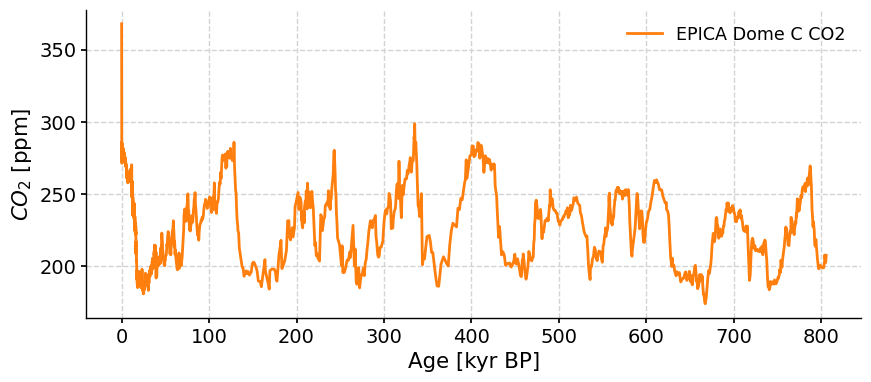

In [ ]:
ts_co2.plot(color='C1')

Notice that the x-axis is plotted with present-day (0 kyr) on the left and the past (800 kyr) on the right. This is a common practice when plotting paleoclimate time series data.

What do you observe about the changes in CO2 over the past 800,000 years? 

*   What might be causing this pattern?
*   Why is there a rapid increase in CO2 in the very recent past (i.e., the past ~1,000 years)? 

## Exploring the relationship between dD and atmospheric CO2

These changes in CO2 are tracking glacial-interglacial cycles (Ice Ages) over the past 800,000 years. Recall that these Ice Ages occur as a result of changes in the orbital cycles of Earth: eccentricity (100,000 year cycle), obliquity (40,000 year cycle) and precession (21,000 year cycle).


To further investigate the relationship between glacial cycles, atmospheric CO2 and temperature, we can compare CO2 to a hydrogen isotopic values (dD) of ice cores, which is a proxy for temperature. Remember, in this case, a more depleted dD value indicates cooler temperatures, and a more enriched dD value indicates warmer temperatures.

Let's download the EPICA Dome C dD data, store is as a Series, and plot the data:

In [ ]:
# Donwload the data using the url
data_path = pooch.retrieve(
    'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt',
    known_hash=None
)
dDdf = pd.read_csv(
    data_path,
    skiprows=91,
    encoding='unicode_escape',
    sep="\s+"
)
# Remove nan values
dDdf.dropna(inplace=True)

dDdf.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [ ]:
dDts = pyleo.Series(
    time=dDdf['Age']/1000,
    value=dDdf['Deuterium'],
    time_name='Age',
    time_unit='kyr BP',
    value_name=r'$\delta D$',
    value_unit=u'\u2030',
    label=r'EPICA Dome C $\delta D$'
)

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$\\delta D$ [‰]'>)

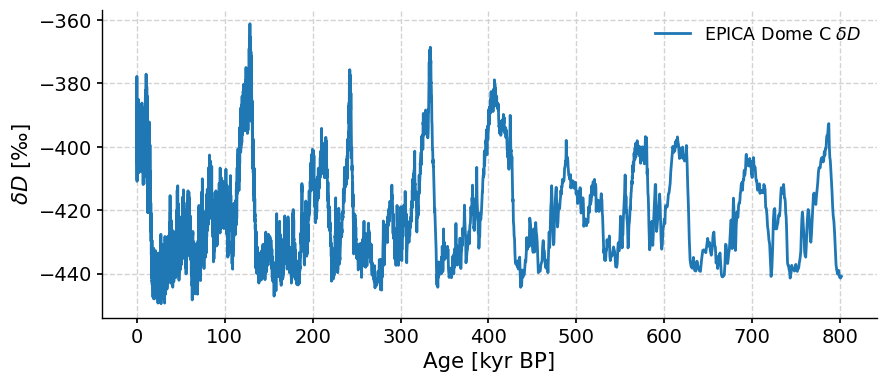

In [ ]:
dDts.plot()

When we observe the dD data, we see very similar patterns as in the atmospheric CO2 data. To more easily compare the two records, we can plot the two series side by side by putting them into a `MultipleSeries` object. Since the dD and CO2 values have different units, we can first standardize the series and then plot the data. 

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='value'>)

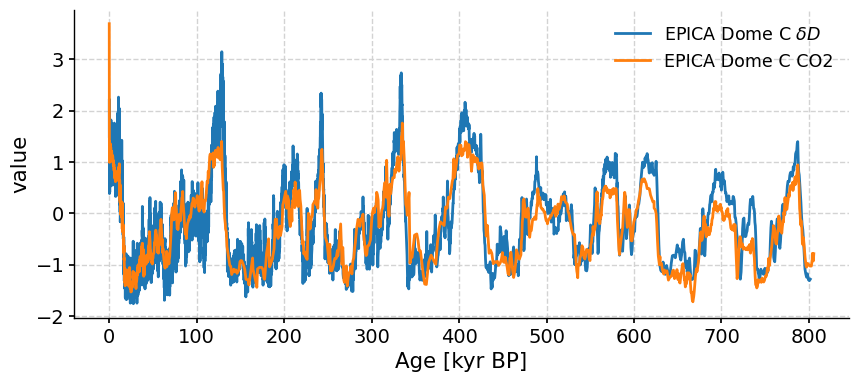

In [ ]:
ms = pyleo.MultipleSeries([dDts,ts_co2])
ms.standardize().plot()

Now we can compare the timing and magnitude of changes in CO2 and dD at EPICA Dome C over the past 800,000 years. During glacial periods, dD was more depleted (cooler temperatures) and atmospheric CO2 was lower. During interglacial periods, dD was more enriched (warmer temperatures) and atmospheric CO2 was higher. We know that the orbital forcings are the main mechanisms causing glacial-interglacial cycles. But why do dD, CO2 and glacial periods covary so closely? 


*   How are atmospheric CO2 and temperature related?
*   How are orbitally-driven solar insolation and temperature related?
*   What ice-related feedbacks occur in response to changes in temperature?
*   How do all of these factors influence ice sheet extent?
*   Do the cooling and warming periods of the cycles happen at the same rate?


